<a href="https://colab.research.google.com/github/tasosnikitakis/Machine-and-Deep-Learning/blob/main/Ligue1_xG_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.set_option('display.max_rows', 1000)


url = 'https://fbref.com/en/comps/13/schedule/Ligue-1-Scores-and-Fixtures'

ligue_list = []


ligue_list.append(pd.read_html(url,index_col=False,flavor='lxml')[0])
ligue_list = pd.concat(ligue_list, axis=0, ignore_index=True)


ligue1_df = ligue_list[ligue_list['Wk'].notna()]

ligue1_df = ligue1_df.rename(columns={'xG':'xGHome'
                   ,'xG.1':'xGAway'})


ligue1_df['HomeScore'] = ligue1_df['Score'].str[0]
ligue1_df['AwayScore'] = ligue1_df['Score'].str[2]

ligue1_df = ligue1_df.drop(['Match Report','Notes'],axis=1)

#convert to date

ligue1_df['Date'] = pd.to_datetime(ligue1_df['Date'])

ligue1_df.sort_values(by='Date', inplace=True)

ligue1_df = ligue1_df[['Wk','Day','Date','Time','Home','HomeScore','xGHome','AwayScore','xGAway','Away','Attendance','Venue','Referee']]

In [2]:

ligue1_df = ligue1_df.dropna()

In [3]:
ligue1_df = ligue1_df[['Date','Home','HomeScore','xGHome','AwayScore','xGAway','Away']].reset_index(drop=True)

In [4]:
ligue1_df

,Date,Home,HomeScore,xGHome,AwayScore,xGAway,Away
0,2022-08-05,Lyon,2,1.3,1,1.5,Ajaccio
1,2022-08-06,Strasbourg,1,0.8,2,2.8,Monaco
2,2022-08-06,Clermont Foot,0,0.3,5,3.5,Paris S-G
3,2022-08-07,Rennes,0,1.8,1,1.1,Lorient
4,2022-08-07,Montpellier,3,1.7,2,2.0,Troyes
5,2022-08-07,Lille,4,2.4,1,0.6,Auxerre
6,2022-08-07,Marseille,4,2.1,1,0.9,Reims
7,2022-08-07,Lens,3,2.5,2,1.2,Brest
8,2022-08-07,Toulouse,1,0.9,1,1.2,Nice
9,2022-08-07,Angers,0,1.5,0,1.5,Nantes


In [5]:
league_Mean_Home_xG = round((ligue1_df['xGHome'].mean()),2)
league_Mean_Away_xG = round((ligue1_df['xGAway'].mean()),2)

In [6]:
print(f"The mean home expected goals is:", league_Mean_Home_xG)

The mean home expected goals is: 1.49


In [7]:

print(f"The mean away expected goals is:", league_Mean_Away_xG)

The mean away expected goals is: 1.31


In [8]:
home_team_xg_strength_offense = ligue1_df.groupby('Home').agg({'xGHome': 'sum', 'Home': ['count', 'first']})

home_team_xg_strength_offense.columns = ['xGHome', 'TotalGames', 'Home']

home_team_xg_strength_offense['xGHome_offense_rating'] = (home_team_xg_strength_offense['xGHome'] / home_team_xg_strength_offense['TotalGames']) / league_Mean_Home_xG
home_team_xg_strength_offense = home_team_xg_strength_offense.reset_index(drop = True)
home_team_xg_strength_offense = pd.DataFrame(home_team_xg_strength_offense)
home_team_xg_strength_offense.columns = ['xGHome', 'TotalGames','Home','xGHome_offense_rating']
home_team_xg_strength_offense = home_team_xg_strength_offense[['Home','xGHome','TotalGames','xGHome_offense_rating']]
home_team_xg_strength_offense.sort_values('xGHome_offense_rating', ascending=False)       

,Home,xGHome,TotalGames,xGHome_offense_rating
6,Lille,29.6,15,1.324385
14,Paris S-G,27.5,14,1.318313
15,Reims,25.9,14,1.241611
5,Lens,29.4,16,1.233221
9,Marseille,27.0,15,1.208054
10,Monaco,24.4,14,1.169703
8,Lyon,25.2,15,1.127517
16,Rennes,24.7,15,1.105145
18,Toulouse,25.1,16,1.052852
12,Nantes,19.7,14,0.944391


the larger the number in the offense rating the better the attack



In [9]:
away_team_xg_strength_offense = ligue1_df.groupby('Away').agg({'xGAway': 'sum', 'Away': ['count', 'first']})
away_team_xg_strength_offense.columns = ['xGAway', 'TotalGames', 'Away']
away_team_xg_strength_offense['xGAway_offense_rating'] = (away_team_xg_strength_offense['xGAway'] / away_team_xg_strength_offense['TotalGames']) / league_Mean_Away_xG
away_team_xg_strength_offense = away_team_xg_strength_offense.reset_index(drop = True)
away_team_xg_strength_offense = pd.DataFrame(away_team_xg_strength_offense)
away_team_xg_strength_offense.columns = ['xGAway', 'TotalGames','Away','xGAway_offense_rating']
away_team_xg_strength_offense = away_team_xg_strength_offense[['Away','xGAway','TotalGames','xGAway_offense_rating']]
away_team_xg_strength_offense.sort_values('xGAway_offense_rating', ascending=False)     

,Away,xGAway,TotalGames,xGAway_offense_rating
14,Paris S-G,33.3,15,1.694656
6,Lille,26.0,15,1.323155
5,Lens,25.7,15,1.307888
10,Monaco,23.6,14,1.286805
9,Marseille,22.6,14,1.232279
16,Rennes,21.2,14,1.155943
8,Lyon,22.2,16,1.059160
13,Nice,19.1,14,1.041439
19,Troyes,20.1,15,1.022901
15,Reims,19.6,15,0.997455


Defense ratings - this is the inverse so the defense rating is based on away league averages



In [10]:
home_team_xg_strength_defence = ligue1_df.groupby('Home').agg({'xGAway': 'sum', 'Home': ['count', 'first']})

home_team_xg_strength_defence.columns = ['xG_Conceded', 'TotalGames', 'Home']

home_team_xg_strength_defence['xG_home_defense_rating'] = (home_team_xg_strength_defence['xG_Conceded'] / home_team_xg_strength_defence['TotalGames']) / league_Mean_Away_xG

home_team_xg_strength_defence = home_team_xg_strength_defence.reset_index(drop = True)
home_team_xg_strength_defence = pd.DataFrame(home_team_xg_strength_defence)

home_team_xg_strength_defence.columns = ['xG_Conceded', 'TotalGames','Home','xG_home_defense_rating']

home_team_xg_strength_defence = home_team_xg_strength_defence[['Home','xG_Conceded','TotalGames','xG_home_defense_rating']]
home_team_xg_strength_defence.sort_values('xG_home_defense_rating', ascending=True)    

,Home,xG_Conceded,TotalGames,xG_home_defense_rating
5,Lens,14.5,16,0.691794
16,Rennes,14.0,15,0.712468
6,Lille,15.0,15,0.763359
13,Nice,14.8,14,0.806979
15,Reims,15.4,14,0.839695
9,Marseille,17.6,15,0.895674
8,Lyon,18.1,15,0.921120
7,Lorient,18.4,15,0.936387
14,Paris S-G,17.3,14,0.943293
2,Auxerre,17.7,14,0.965104


In [11]:
away_team_xg_strength_defence = ligue1_df.groupby('Away').agg({'xGHome': 'sum', 'Away': ['count', 'first']})

away_team_xg_strength_defence.columns = ['xG_Conceded', 'TotalGames', 'Away']

away_team_xg_strength_defence['xG_away_defense_rating'] = (away_team_xg_strength_defence['xG_Conceded'] / away_team_xg_strength_defence['TotalGames']) / league_Mean_Home_xG

away_team_xg_strength_defence = away_team_xg_strength_defence.reset_index(drop = True)
away_team_xg_strength_defence = pd.DataFrame(away_team_xg_strength_defence)

away_team_xg_strength_defence.columns = ['xG_Conceded', 'TotalGames','Away','xG_away_defense_rating']

away_team_xg_strength_defence = away_team_xg_strength_defence[['Away','xG_Conceded','TotalGames','xG_away_defense_rating']]
away_team_xg_strength_defence.sort_values('xG_away_defense_rating', ascending=True)  

,Away,xG_Conceded,TotalGames,xG_away_defense_rating
14,Paris S-G,17.1,15,0.765101
13,Nice,16.9,14,0.810163
10,Monaco,17.4,14,0.834132
6,Lille,19.1,15,0.854586
9,Marseille,18.0,14,0.862895
5,Lens,19.4,15,0.868009
12,Nantes,19.7,15,0.881432
0,Ajaccio,18.5,14,0.886865
8,Lyon,22.4,16,0.939597
16,Rennes,20.8,14,0.997124


Now we are in a position to calculate the total expected goals per team in a match - lets try predict the game on Sunday 12th february between LYON - LENS.

WE Need to first multiple lyons home offense rating by lens away defense rating by the league mean xg scored by home team

In [12]:
lyon_home_offense_rating = 1.179361
lens_away_defense_rating = 0.921376

lyon_home_expected_xg = (lyon_home_offense_rating * lens_away_defense_rating) * league_Mean_Home_xG
lyon_home_expected_xg

1.61908603189664

In [13]:
lens_away_offense_rating = 1.291866
lyon_home_defense_rating = 0.840738

lens_away_expected_xg = (lens_away_offense_rating * lyon_home_defense_rating) * league_Mean_Away_xG

lens_away_expected_xg

1.42281829661148

According to the league stats to date we expect lyon to record 1.9298 xg and lens 1.4445 xg

Use the poisson distribution to calculate the probabilities of all score lines up to 10 goals

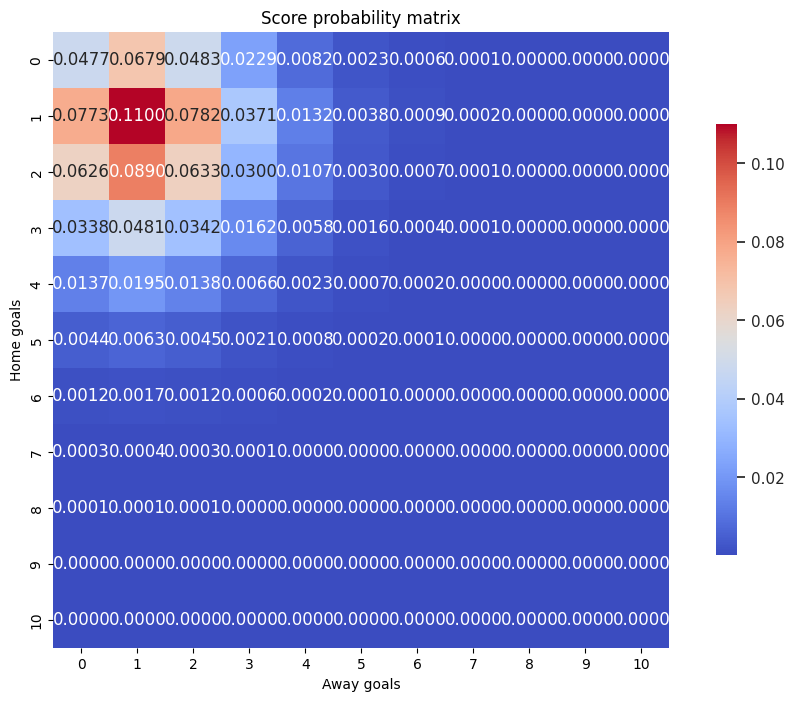

In [14]:
import numpy as np
from scipy.stats import poisson
import seaborn as sns
import matplotlib.pyplot as plt

home_expectancy = lyon_home_expected_xg
away_expectancy = lens_away_expected_xg


max_score = 10
score_range = np.arange(0, max_score+1)

home_pmf = poisson.pmf(score_range, home_expectancy)
away_pmf = poisson.pmf(score_range, away_expectancy)

# calculate the outer product of the home and away PMFs
score_prob_matrix = np.outer(home_pmf, away_pmf)

# reshape the matrix into a square matrix of score probabilities
score_prob_matrix = score_prob_matrix.reshape(max_score+1, max_score+1)


# set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# create a heatmap using seaborn
sns.set()
sns.heatmap(score_prob_matrix, cmap="coolwarm", annot=True, fmt=".4f", square=True, cbar_kws={"shrink": 0.7}, ax=ax)

# set the axis labels and title
plt.xlabel("Away goals")
plt.ylabel("Home goals")
plt.title("Score probability matrix")

# display the plot
plt.show()

In [15]:
# calculate the sums of home wins, draws, and away wins
home_wins = np.sum(np.tril(score_prob_matrix, -1))
draws = np.sum(np.diag(score_prob_matrix))
away_wins = np.sum(np.triu(score_prob_matrix, 1))

# create a table to display the sums
table_data = {
    "Home wins": [home_wins],
    "Draws": [draws],
    "Away wins": [away_wins]
}
table = pd.DataFrame(table_data)

# display the table
print(table)

   Home wins    Draws  Away wins
0   0.422905  0.23985   0.337244


In [16]:
1/0.415806

2.4049677012837716

Use the poisson distribution to calculate the probabilities of all score lines up to 7 goals
Zero inflated poisson

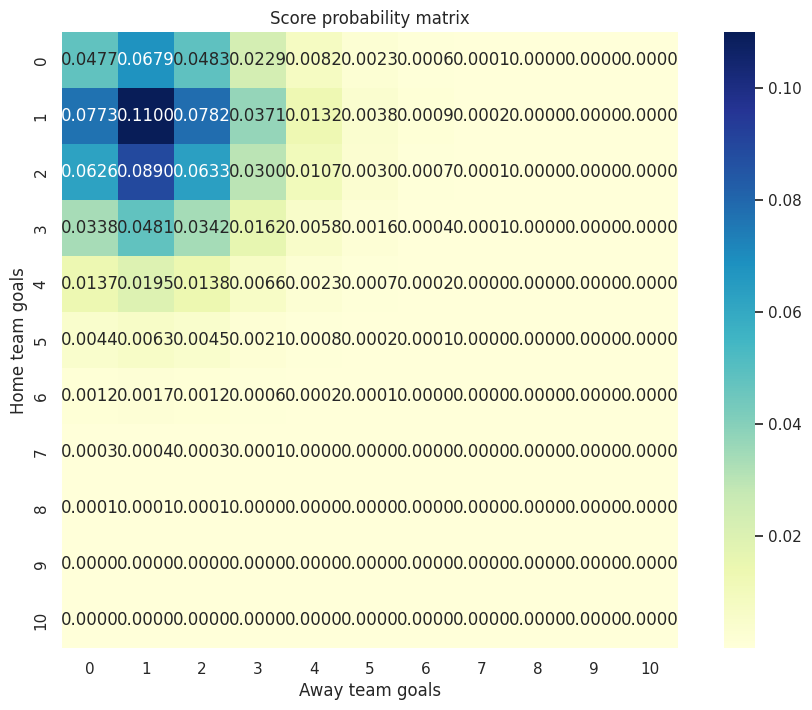

In [17]:
import numpy as np
from scipy.stats import poisson

home_expectancy = lyon_home_expected_xg
away_expectancy = lens_away_expected_xg

max_score = 10
score_range = np.arange(0, max_score+1)

# Calculate the probabilities of scoring zero goals using the Poisson distribution with a lambda of zero
home_zero_pmf = poisson.pmf(0, home_expectancy)
away_zero_pmf = poisson.pmf(0, away_expectancy)

# Calculate the probabilities of scoring non-zero goals using the Poisson distribution with lambda equal to the expectancies
home_nonzero_pmf = poisson.pmf(score_range, home_expectancy)
away_nonzero_pmf = poisson.pmf(score_range, away_expectancy)

# Combine the probabilities of zero and non-zero goals using the zero-inflated Poisson distribution
home_pmf = (1 - home_zero_pmf) * home_nonzero_pmf
away_pmf = (1 - away_zero_pmf) * away_nonzero_pmf

# Normalize the score probabilities to sum to 1.0 over the truncated range
score_prob_matrix /= score_prob_matrix.sum()

# set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Display the score probability matrix as a heatmap
sns.heatmap(score_prob_matrix, cmap="YlGnBu", annot=True, fmt=".4f", square=True, xticklabels=score_range, yticklabels=score_range)

plt.xlabel("Away team goals")
plt.ylabel("Home team goals")
plt.title("Score probability matrix")

plt.show()

In [18]:
# calculate the sums of home wins, draws, and away wins
home_wins = np.sum(np.tril(score_prob_matrix, -1))
draws = np.sum(np.diag(score_prob_matrix))
away_wins = np.sum(np.triu(score_prob_matrix, 1))

# create a table to display the sums
table_data = {
    "Home wins": [home_wins],
    "Draws": [draws],
    "Away wins": [away_wins]
}
table = pd.DataFrame(table_data)

# display the table
print(table)

   Home wins    Draws  Away wins
0   0.422905  0.23985   0.337244


In [19]:
1/0.415806

2.4049677012837716